In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_docking_results(score_pd, name, ax):
    # BEGIN: Plotting I_sc vs Irms with CAPRI_rank
    scatter = ax.scatter(score_pd['Irms'], 
                         score_pd['I_sc'], 
                         c=score_pd['CAPRI_rank'], 
                         cmap='viridis', 
                         marker='o', 
                         vmin=0, 
                         vmax=3,)

    # Create a legend for the discrete CAPRI_rank values
    legend1 = ax.legend(*scatter.legend_elements(), title="CAPRI_rank", loc='lower right')
    ax.add_artist(legend1)

    # Set labels
    ax.set_xlabel('Irms')
    ax.set_ylabel('I_sc')
    ax.set_title(name)

    # Ensure x-axis is between 0 and 20
    ax.set_xlim(0, 20)
    ax.set_ylim(-50, 0)
    
    # END: Plotting I_sc vs Irms with CAPRI_rank

In [9]:
def make_plots(folder):
    fig, axes = plt.subplots(3, 3, figsize=(15, 10))
    axes = axes.flatten()

    files_unordered = []

    for i, (root, dirs, files) in enumerate(os.walk(folder)):
        for j, file in enumerate(files):
            if j >= len(axes):
                break
            
            files_unordered.append(file)

    ordered_files = sorted(files_unordered, key=lambda x: (not x.endswith('_natural.score'), not x.endswith('_de_novo.score'), x))
    for j, file in enumerate(ordered_files):
            path = os.path.join(root, file)
            score_pd = pd.read_csv(path, sep='\s+', header=1)
            plot_docking_results(score_pd, file, axes[j])

    plt.tight_layout()
    plt.show()

# 7vux

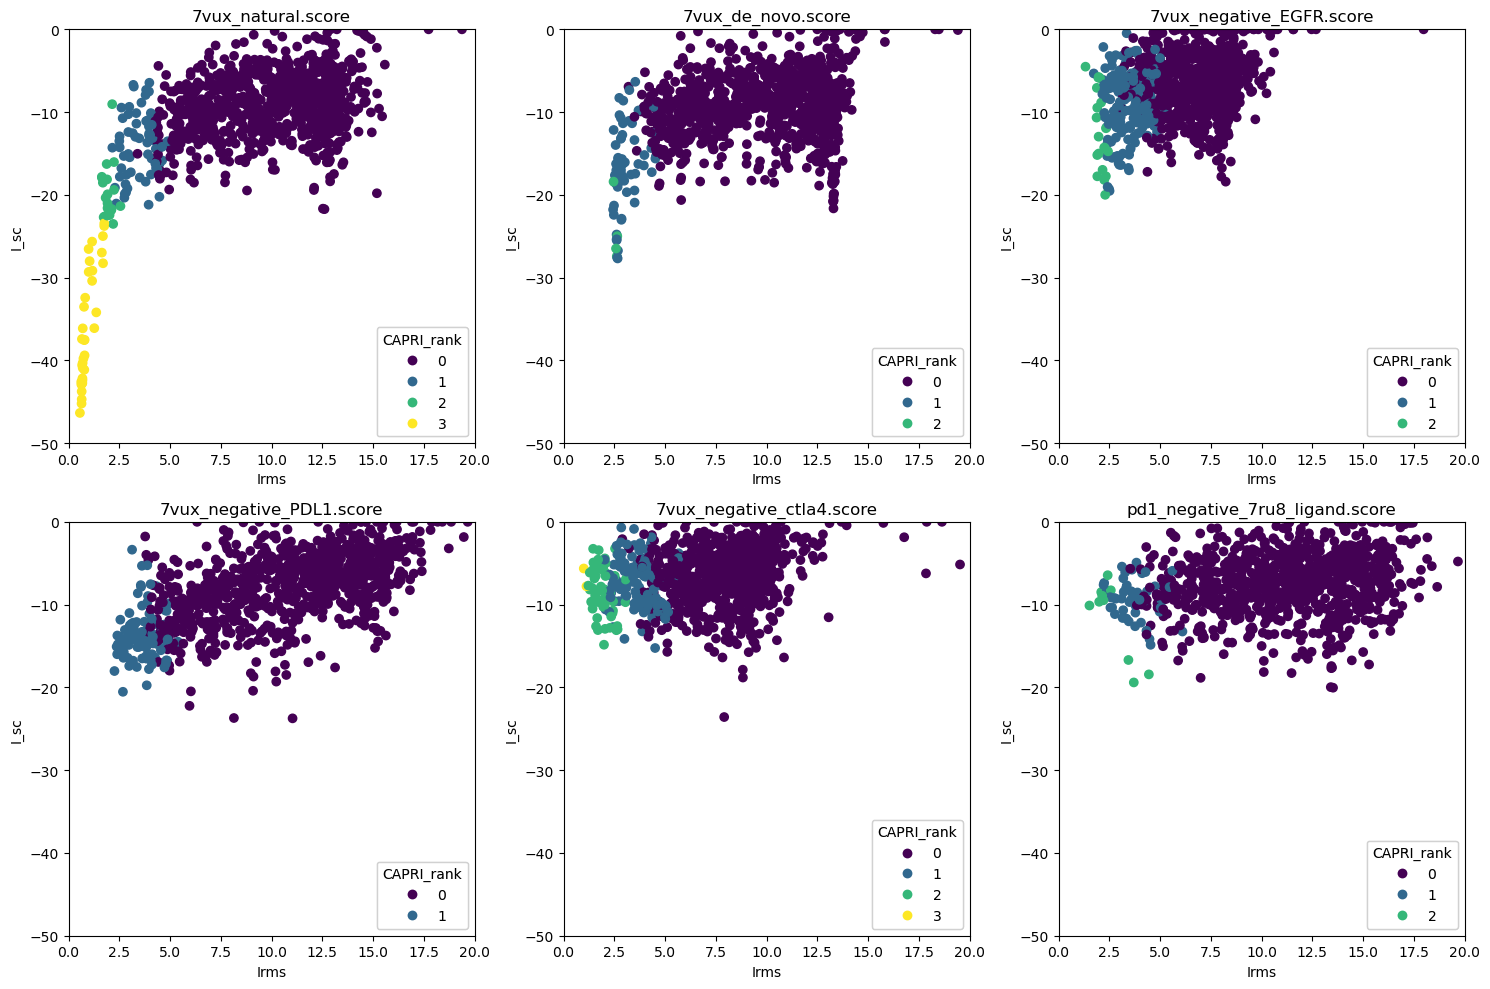

In [5]:
vux_folder = "../../datasets/docking_output/PD1"
make_plots(vux_folder)

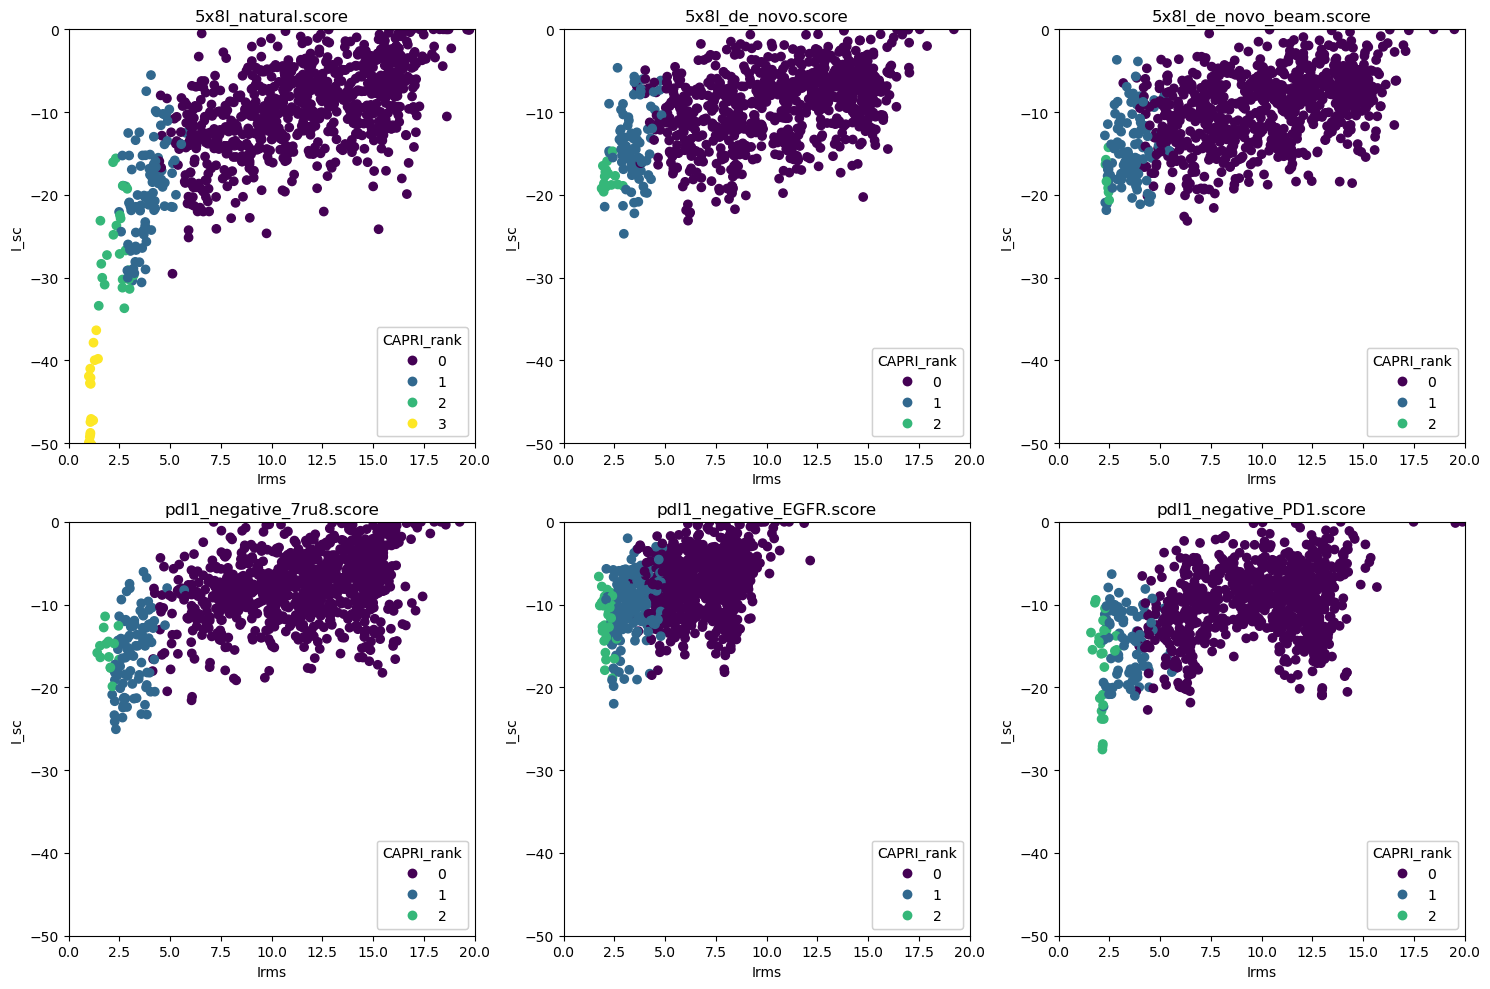

In [4]:
PLD1_folder = "../../datasets/docking_output/PDL1"
make_plots(PLD1_folder)

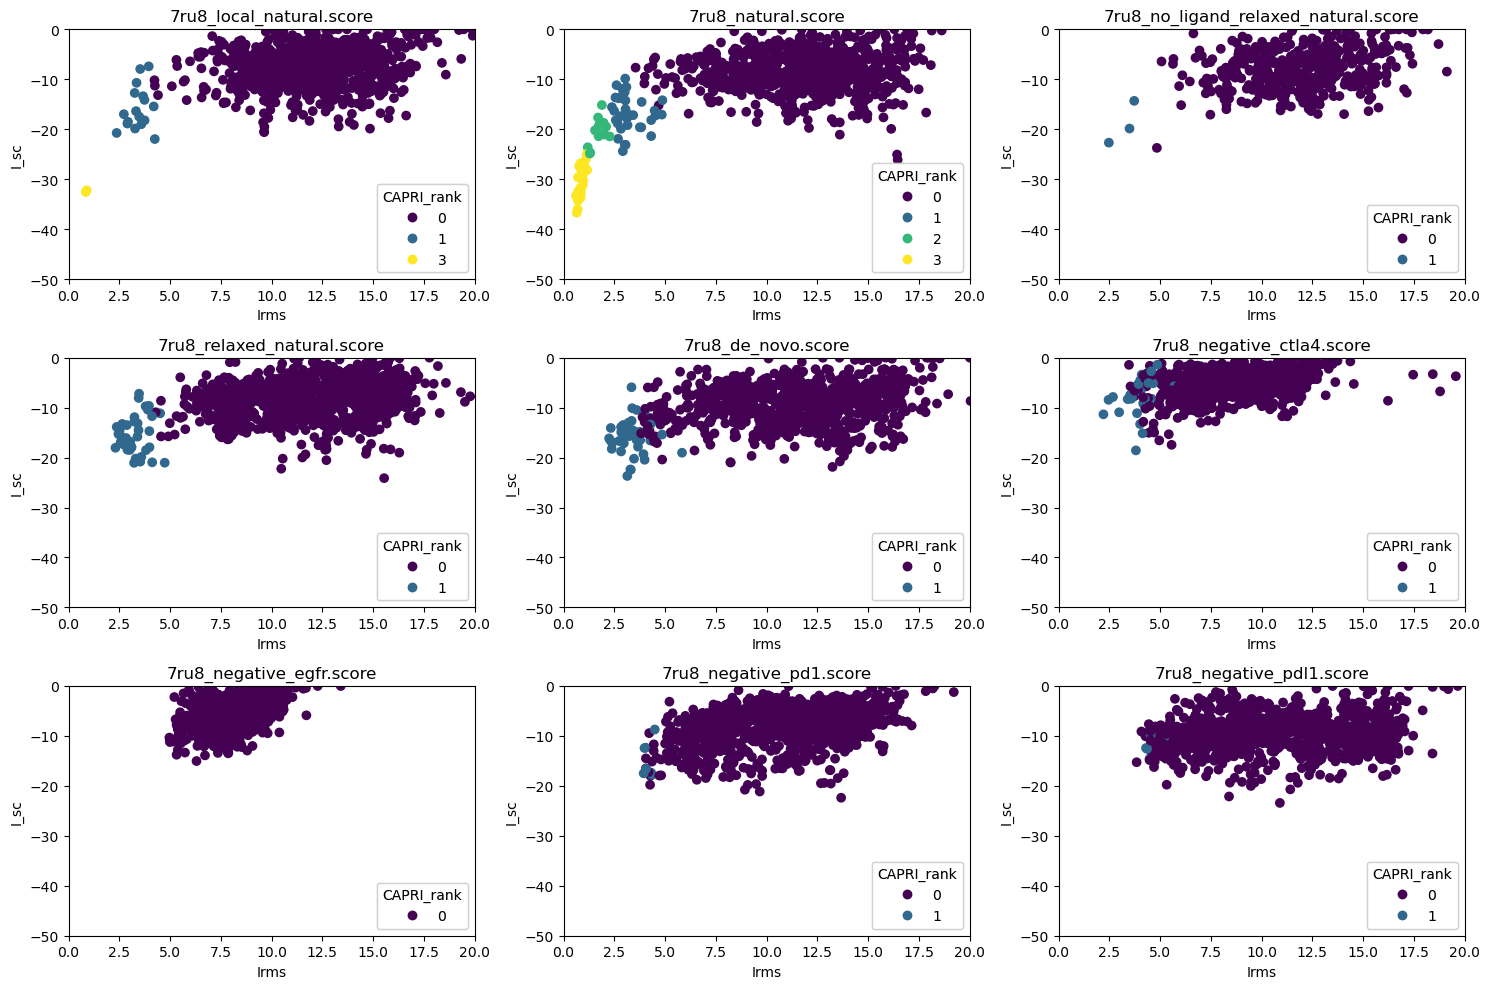

In [13]:
covid_folder = "../../datasets/docking_output/7ru8"
make_plots(covid_folder)

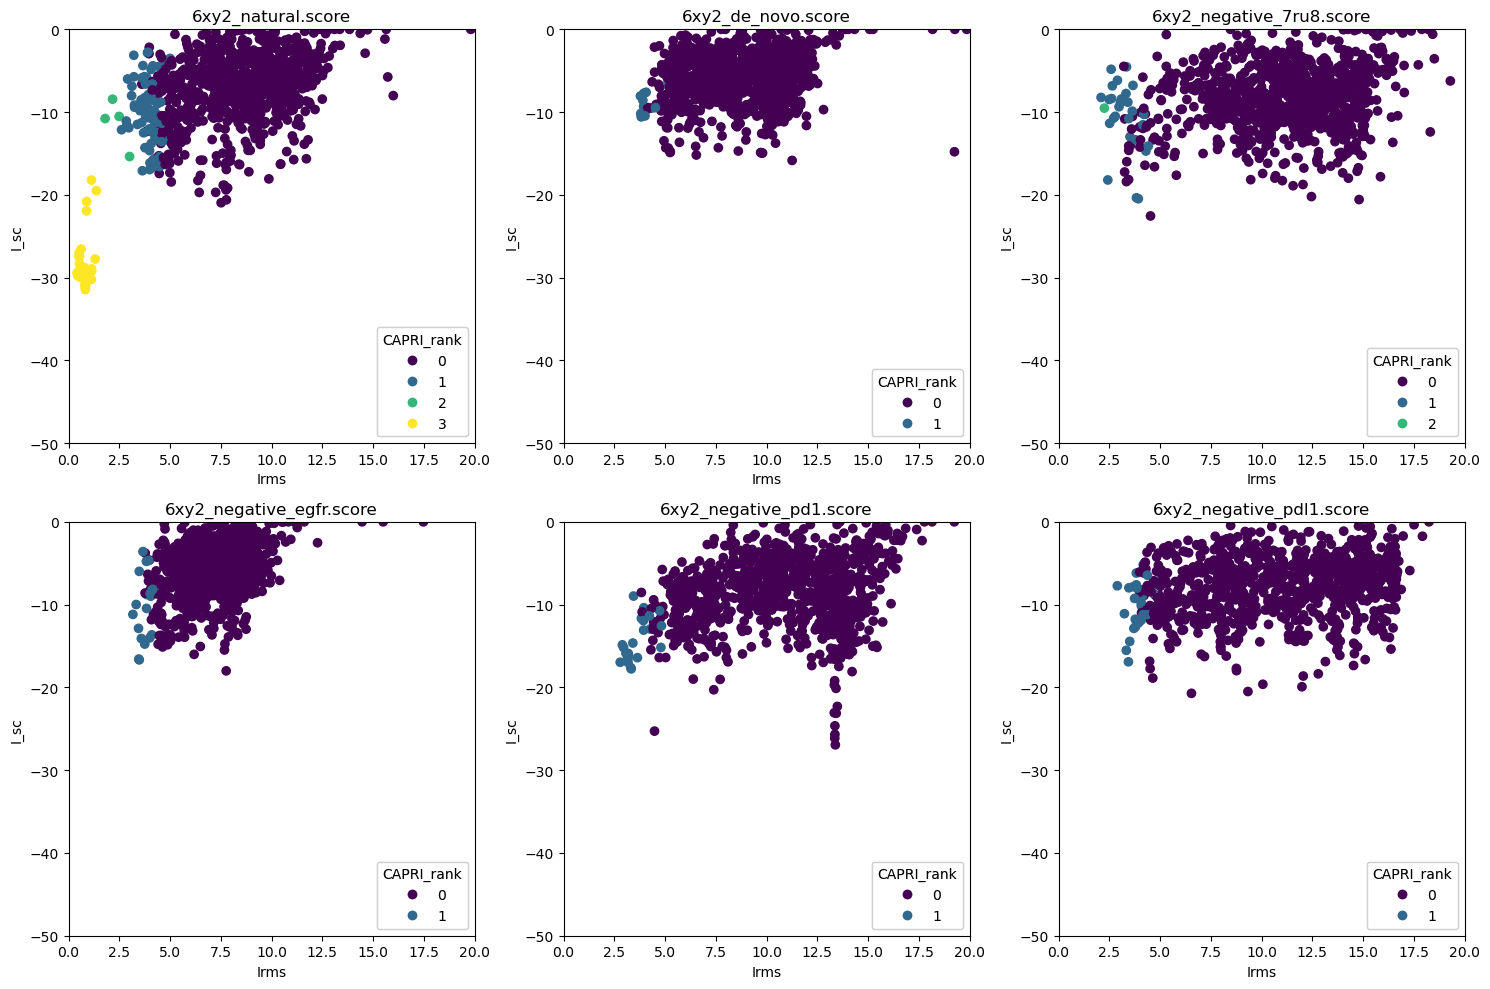

In [40]:
ctla4_folder = "../../datasets/docking_output/CTLA4"
make_plots(ctla4_folder)

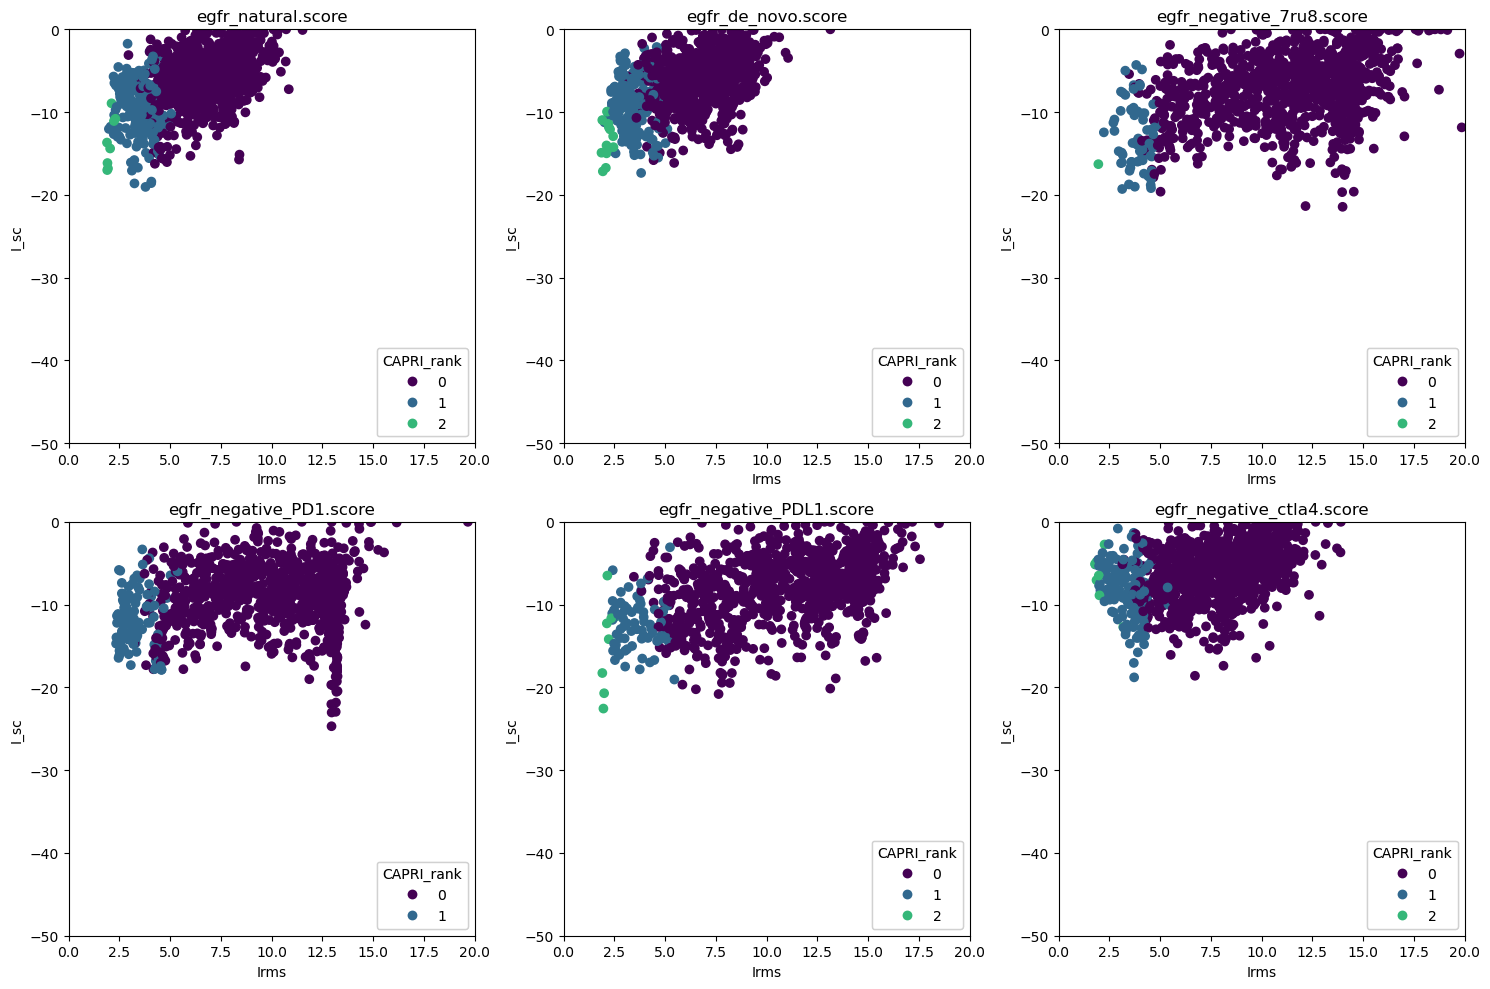

In [41]:
egfr_folder = "../../datasets/docking_output/EGFR"
make_plots(egfr_folder)